# Exercise 2: Hypothesis testing

In this exercise we will test if 10 different measurements of the same quantity are well-described by a single average value or not. 

In the lab ten nominally identical samples of superconducting material are made and tested using the same procedure. Due to factors that are not under control in the experiment it could be that slightly different materials are being produced. 

For each sample of superconducting material the critical temperature $T_c$ is determined using the same setup and same criterion to identify the transition. The uncertainty in the transition temperature introduced by this method is $\pm$ 0.2 K.

The transition temperature for the 10 samples is found to be:

In [1]:
import numpy as np
Tc=np.array([10.2, 10.4, 9.8, 10.5, 9.9, 9.8, 10.3, 10.1, 10.3, 9.9])

## Plot the data

It is always a good idea to plot the data before you start any calculation

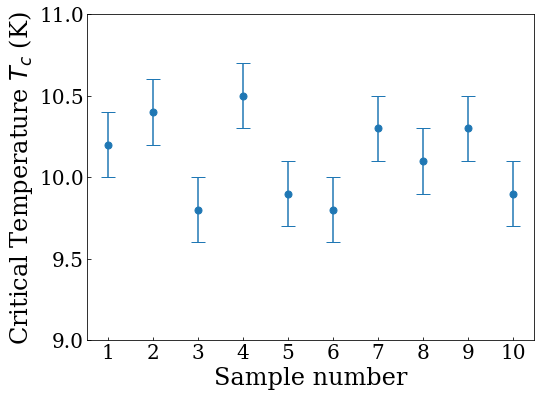

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Some default styling for the figures; best solution is once at the beginning of the code
# See https://matplotlib.org/3.1.3/tutorials/introductory/customizing.html
# These settings assume that you have used import matplotlib.pyplot as plt 

# Smallest font size is a 10 point font for a 4 inch wide figure. 
# font sizes and figure size are scaled by a factor 2 to have a large figure on the screen

SMALL_SIZE = 10*2                                        
MEDIUM_SIZE = 12*2
BIGGER_SIZE = 14*2

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches

# data
x = np.arange(1, 11, 1)
err=np.full((10),0.2)

plt.figure()
plt.errorbar(x, Tc, yerr=err, ls='None', marker='o', markersize=7, capsize=7)
plt.xticks(x) # Simply put a label for each sample
plt.xlabel('Sample number')
plt.yticks((9.0,9.5,10.0,10.5,11.0))
plt.ylabel('Critical Temperature $T_c$ (K)')
plt.ylim(9,11)
plt.show()

According to the hypothesis it is suggested that all measurements of $T_c$ correspond to the same true value with the differences between measurement explained by measurement errors.

### a) Calculate the average value of $T_c$ and the error bar

The average value of T_c is  10.12 +/- 0.06 K 



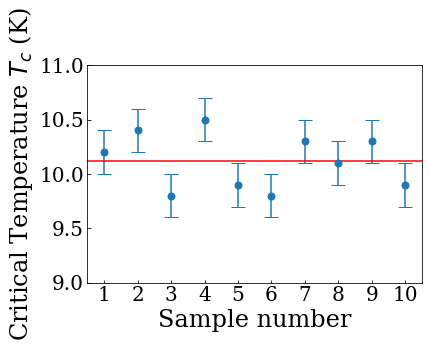

In [3]:
Tc_avg=np.average(Tc) # This gives a weighted average with a weight of the inverse variance
Tc_err=np.sqrt(1.0/(11.0/0.2**2)) # Note that this is the statistical error using the formula.

print("The average value of T_c is %6.2f +/- %2.2f K \n" % (Tc_avg,Tc_err)) 

plt.figure()
plt.errorbar(x, Tc, yerr=err, ls='None', marker='o', markersize=7, capsize=7)
xfit=np.linspace(0,12,100)  # I want the fit function to look smooth
plt.plot(xfit,xfit*0.0+Tc_avg, ls='solid', color='red')
plt.xticks(x) # Simply put a label for each sample
plt.xlabel('Sample number')
plt.yticks((9.0,9.5,10.0,10.5,11.0))
plt.ylabel('Critical Temperature $T_c$ (K)')
plt.ylim(9,11)
plt.xlim(0.5,10.5)

plt.show()

This value minimizes the least squares defined by

$$\chi^2 = \sum_i (y_i - \bar{y})^2$$

and is thus by definition the best fit to the data. 

### b) Calculate this minimum value of $\chi^2$

The mimimum value of chi-squared is 0.596


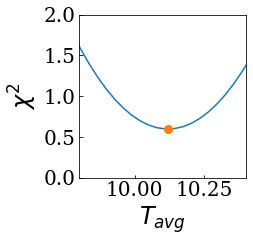

In [4]:
x2=np.sum((Tc-Tc_avg)**2)
print('The mimimum value of chi-squared is %4.3f' % x2)

# Let's show that it is indeed a minimum
Ta=np.linspace(9.5,11.0,50)
x2array=np.ones(50)
for i in range(len(Ta)):
    x2array[i] = np.sum((Tc-Ta[i])**2)
    
plt.figure(figsize=(3,3))
plt.plot(Ta,x2array)
plt.plot(Tc_avg,x2, marker='o', markersize=8)
plt.ylabel('$\chi^2$')
plt.xlabel('$T_{avg}$')
plt.ylim(0,2.0)
plt.xlim(9.8,10.4)
plt.xticks((10.0,10.25))
plt.show()

### c) Determine the number of degrees of freedom

In [5]:
# The number of degrees of freedom is equal to the number of datapoints minus the number of fit parameters
# In this case the 'fit' parameter is the average value

dof=len(Tc)-1
print('There are %d degrees of freedom' % dof)

There are 9 degrees of freedom


### d) Given the value of $\chi^2$, do you believe that the samples are indeed identical? 

Hint: calculate the probability that you find a value of $\chi^2$ smaller or equal than the value obtained in b) by taking into account the error bar on the measurement and the number of degrees of freedom.

#### First attempt from the plot

One can plot the average and confidence intervals using the error bar on the datapoints of 0.2 K. Note that we should take the error on the measurement and not the standard deviation for the best estimate of the average. One can see that all values are within 2 sigma from the average. However, 5 points are more than 1 standard deviation away from the average and only 4 points are within a standard deviation. This is a little suspicious. We need to quantify this. 

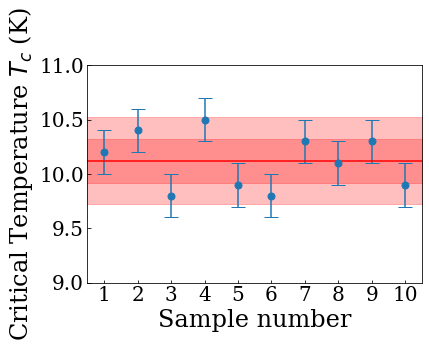

In [6]:
plt.figure()
plt.errorbar(x, Tc, yerr=err, ls='None', marker='o', markersize=7, capsize=7)
xfit=np.linspace(0,12,100)  # I want the fit function to look smooth
plt.plot(xfit,xfit*0.0+Tc_avg, ls='solid', color='red')
plt.xticks(x) # Simply put a label for each sample
plt.xlabel('Sample number')
plt.yticks((9.0,9.5,10.0,10.5,11.0))
plt.ylabel('Critical Temperature $T_c$ (K)')
plt.ylim(9,11)
plt.xlim(0.5,10.5)

# Add confidence intervals
nstd = 1.0 # to draw nstd-sigma intervals
fit_up = xfit*0.0+Tc_avg+nstd*0.2
fit_dw = xfit*0.0+Tc_avg-nstd*0.2
plt.fill_between(xfit, fit_up, fit_dw, color='red', alpha=.25)

nstd = 2.0 # to draw nstd-sigma intervals
fit_up = xfit*0.0+Tc_avg+nstd*0.2
fit_dw = xfit*0.0+Tc_avg-nstd*0.2
plt.fill_between(xfit, fit_up, fit_dw, color='red', alpha=.25)

plt.show()

#### Second attempt with the value of $\chi^2$

The problem with the values of $\chi^2$ that we calculated is that it is not yet properly normalized which makes it difficult to interpret the absolute value. What should we compare the value to?

We should normalize using the error bar by calculating the normalized $\chi^2$

$$\chi_n^2 = \sum_i \frac{(y_i - \bar{y})^2}{\sigma_i^2} = \frac{1}{\sigma^2} \sum_i (y_i - \bar{y})^2 = \frac{\chi^2}{\sigma^2} $$

where we used that the error bar or each data point is identical after the first equality sign. We can then compare this normalized value to the expected value. We expect that the normalized value $\chi_n^2$ is equal to the number of degrees of freedom. 

If we approximate the $\chi^2$ distribution to be Gaussian (for a large number of degrees of freedom) the variance should be 
twice the number of degrees of freedom. 

In [7]:
# Normalized chi-squared value
print('The normalized value of the minimum chi-squared is %4.2f \n' % (x2/(0.2**2)))
print('The expected value of the minimum chi-squared is equal to the degree of freedom. DOF = %4.2f \n' % dof)
print('If we approximate the distribution as Gaussian the standard deviation should be %4.2f \n' % np.sqrt(2*dof))

The normalized value of the minimum chi-squared is 14.90 

The expected value of the minimum chi-squared is equal to the degree of freedom. DOF = 9.00 

If we approximate the distribution as Gaussian the standard deviation should be 4.24 



The value of the normalized minimum $\chi^2$ value is quite a bit higher than the expectation value, but it only slightly more than a standard deviation away from the expectation value. There is no need to worry in this case. 

Since we are using Python we could actually calculate the probabilty to find this value or a higher value using the real $\chi^2$ distribution. For 9 degrees of freedom this distribution is not so Gaussian.

9.0
18.0


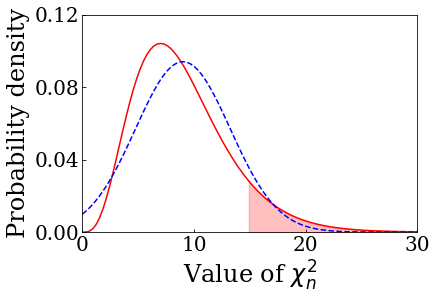

The probability that the value of chi-squared is larger than 14.9 is 0.094


In [8]:
from scipy.stats import chi2,norm
mean, var, skew, kurt = chi2.stats(dof, moments='mvsk')
print(mean) # Find the average value of the distribution
print(var)  # Find the variance

# The problem is not the expectation value or the variance of the distribution. 
# The distribtuion is not Guassian, i.e. has higher order moments

x = np.linspace(0, 30, 100)
xx = np.linspace((x2/(0.2**2)),30,100)
plt.plot(x, chi2.pdf(x, dof), ls='solid', color='red')
plt.fill_between(xx, xx*0.0, chi2.pdf(xx, dof), color='red', alpha=.25)
plt.plot(x, norm.pdf(x, dof,np.sqrt(2*dof)), ls='dashed', color='blue')
plt.xlim(0,30)
plt.xlabel('Value of $\chi_n^2$')
plt.ylim(0,0.12)
plt.ylabel('Probability density')
plt.yticks((0,0.04,0.08, 0.12))
plt.show()

# We need to calculate the probability corresponding to the red area. This is the probability that the value
# of chi-square is larger than the value we found. This is best done via the cumulative distribution function

print('The probability that the value of chi-squared is larger than %4.1f is %4.3f' % 
      ((x2/0.2**2),(1.0-chi2.cdf(x2/0.2**2, dof))))

**Interpretation/Conclusion:** There is a 9.4% probability to find a value of at least 14.9. This is not an alarming number and we should not reject the hypothesis. In other words, it is not unreasonable that the samples are identical given these datapoints and error bars. 

If at all possible I would advise to try to narrow down the experimental error, or do more measurements. 